In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import preprocess_input


/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [2]:
train_dir='/kaggle/input/private-datasetrar/224x224/train'
valid_dir='/kaggle/input/private-datasetrar/224x224/valid'
test_dir='/kaggle/input/private-datasetrar/224x224/test'

In [3]:
batch_size = 32
img_height,img_width = (224,224)
num_classes = 2
EPOCHS = 50

In [4]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.4
)

In [5]:
train_generator = train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

Found 1593 images belonging to 2 classes.


In [6]:
valid_generator = train_datagen.flow_from_directory(
    directory=valid_dir,
    target_size=(img_height, img_width),
    batch_size=1,
    class_mode='categorical',
    subset='validation'
)

Found 457 images belonging to 2 classes.


In [7]:
test_generator = train_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(img_height, img_width),
    batch_size=1,
    class_mode='categorical',
    subset='validation'
)

Found 455 images belonging to 2 classes.


In [8]:
target_names = ['Diseased', 'Healthy']

Epoch 1
1/1 [==============================] - 0s 24ms/step


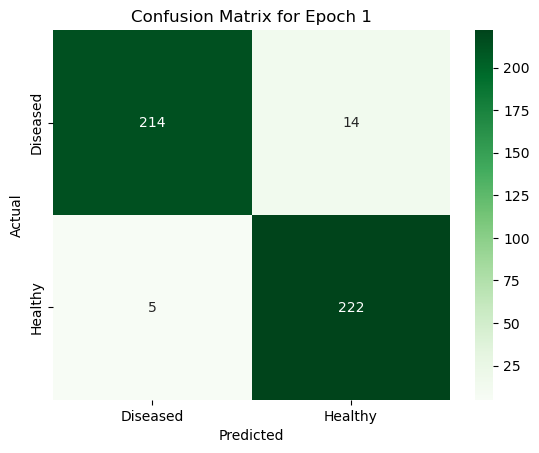

Test accuracy: 95.82417582417582
              precision    recall  f1-score   support

    Diseased       0.98      0.94      0.96       228
     Healthy       0.94      0.98      0.96       227

    accuracy                           0.96       455
   macro avg       0.96      0.96      0.96       455
weighted avg       0.96      0.96      0.96       455

-----------------------------------------------------
Epoch 2
1/1 [==============================] - 0s 23ms/step


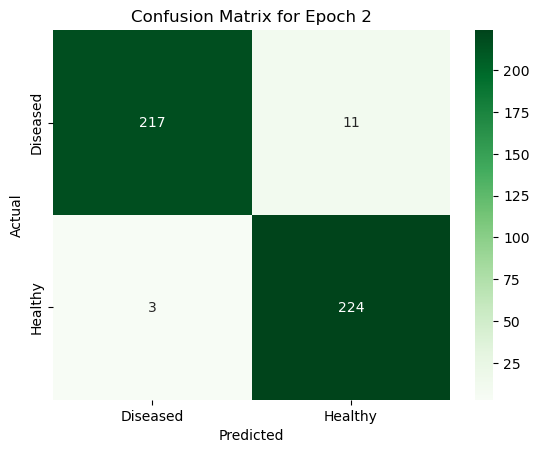

Test accuracy: 96.92307692307692
              precision    recall  f1-score   support

    Diseased       0.99      0.95      0.97       228
     Healthy       0.95      0.99      0.97       227

    accuracy                           0.97       455
   macro avg       0.97      0.97      0.97       455
weighted avg       0.97      0.97      0.97       455

-----------------------------------------------------
Epoch 3
1/1 [==============================] - 0s 23ms/step


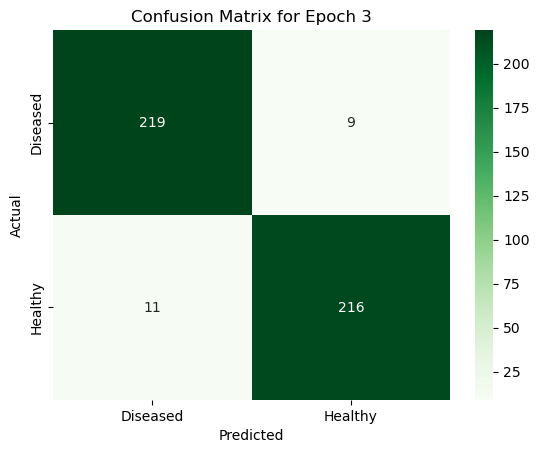

Test accuracy: 95.6043956043956
              precision    recall  f1-score   support

    Diseased       0.95      0.96      0.96       228
     Healthy       0.96      0.95      0.96       227

    accuracy                           0.96       455
   macro avg       0.96      0.96      0.96       455
weighted avg       0.96      0.96      0.96       455

-----------------------------------------------------
Epoch 4
1/1 [==============================] - 0s 22ms/step


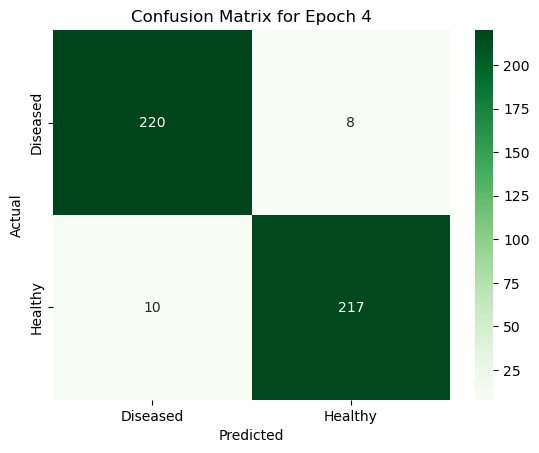

Test accuracy: 96.04395604395604
              precision    recall  f1-score   support

    Diseased       0.96      0.96      0.96       228
     Healthy       0.96      0.96      0.96       227

    accuracy                           0.96       455
   macro avg       0.96      0.96      0.96       455
weighted avg       0.96      0.96      0.96       455

-----------------------------------------------------
Epoch 5
1/1 [==============================] - 0s 23ms/step


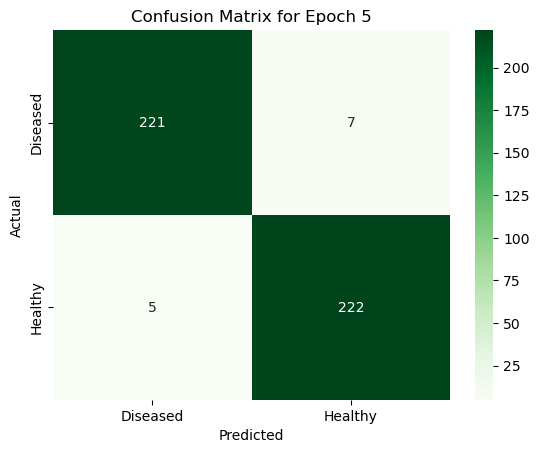

Test accuracy: 97.36263736263736
              precision    recall  f1-score   support

    Diseased       0.98      0.97      0.97       228
     Healthy       0.97      0.98      0.97       227

    accuracy                           0.97       455
   macro avg       0.97      0.97      0.97       455
weighted avg       0.97      0.97      0.97       455

-----------------------------------------------------


In [9]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import tensorflow as tf
saved_model_filepaths = [
    '/kaggle/input/resnet-2/Resnet/50epoch.05-0.10.h5',
    '/kaggle/input/resnet-2/Resnet/50epoch.14-0.08.h5',
    '/kaggle/input/resnet-2/Resnet/50epoch.29-0.09.h5',
    '/kaggle/input/resnet-2/Resnet/50epoch.33-0.11.h5',
    '/kaggle/input/resnet-2/Resnet/50epoch.48-0.06.h5',
]

# Iterate over the saved model file paths
for epoch, model_filepath in enumerate(saved_model_filepaths, start=1):
    print("Epoch {}".format(epoch))
    
    # Load the model
    model = tf.keras.models.load_model(model_filepath)

    filenames = test_generator.filenames
    nb_samples = len(test_generator)

    y_prob = []
    y_act = []

    test_generator.reset()
    for _ in range(nb_samples):
        X_test, Y_test = test_generator.next()
        y_prob.append(model.predict(X_test))
        y_act.append(Y_test)

    predicted_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_prob]
    actual_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_act]

    out_df = pd.DataFrame(np.vstack([predicted_class, actual_class]).T, columns=['predicted_class', 'actual_class'])

    confusion_matrix = pd.crosstab(out_df['actual_class'], out_df['predicted_class'], rownames=['Actual'], colnames=['Predicted'])

    sn.heatmap(confusion_matrix, cmap='Greens', annot=True, fmt='d')
    plt.title('Confusion Matrix for Epoch {}'.format(epoch))
    plt.show()

    print('Test accuracy: {}'.format((np.diagonal(confusion_matrix).sum() / confusion_matrix.sum().sum() * 100)))

    # Generate classification report
    classification_rep = classification_report(out_df['actual_class'], out_df['predicted_class'], target_names=target_names)
    print(classification_rep)
    print("-----------------------------------------------------")